In [0]:
import pandas as pd

In [0]:
fire = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [3]:
fire.shape

(517, 13)

In [5]:
fire.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [0]:
fire.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [0]:
fire.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [0]:
fire.sort_values(by = 'month').groupby('month').size()

month
apr      9
aug    184
dec      9
feb     20
jan      2
jul     32
jun     17
mar     54
may      2
nov      1
oct     15
sep    172
dtype: int64

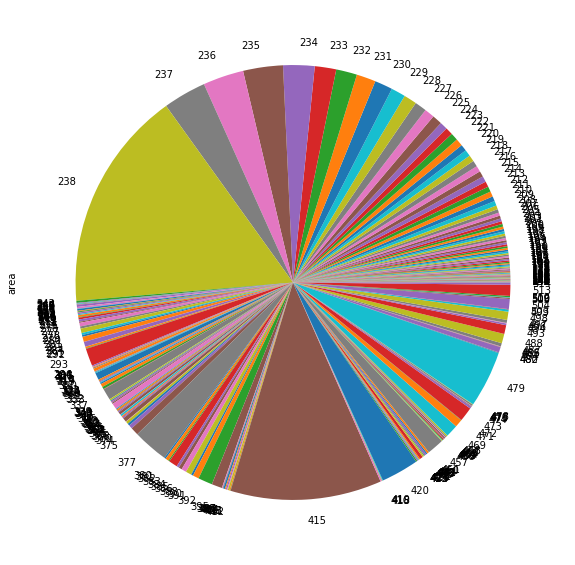

In [0]:
fire['area'].plot.pie(figsize = (15,10))

In [0]:
fire = pd.get_dummies(fire)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fire.values[:,0:12],fire.values[:,12],test_size=0.2)

In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear', LinearRegression ()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [0]:
from sklearn import model_selection

result=[]
names=[]
for name,model in models:
  kfold = model_selection.KFold(n_splits=50)
  cv = model_selection.cross_val_score(model,x_train,y_train,cv=kfold)
  result.append(cv)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv.mean(), cv.std())
  print(msg)

In [0]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

In [0]:
predictions = dtc.predict(x_test)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

In [0]:
pd.DataFrame(predictions,y_test)

In [0]:
import ggplot2

ModuleNotFoundError: ignored

In [0]:
pip install ggplot2

  ERROR: Could not find a version that satisfies the requirement ggplot2 (from versions: none)
ERROR: No matching distribution found for ggplot2
